### Feed-forward coordinate prediction (DualOutput)

In [ ]:
'''
Imports external and own libraries
'''

import pickle

import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

from prettytable import PrettyTable

# own
import collector
import action
import world
import plot
import preprocess
import nets
import train

In [2]:
'''
Load data with pickle (deserialize)
'''
with open('datasets/oracle_data.pickle', 'rb') as handle:
    oracle_data = pickle.load(handle)

with open('datasets/oracle_reversed_data.pickle', 'rb') as handle:
    oracle_reversed_data = pickle.load(handle)

with open('datasets/oracle_random_data.pickle', 'rb') as handle:
    oracle_random_data = pickle.load(handle)

with open('datasets/oracle_reversed_random_data.pickle', 'rb') as handle:
    oracle_reversed_random_data = pickle.load(handle)
    
with open('datasets/random_data.pickle', 'rb') as handle:
    random_data = pickle.load(handle)

In [3]:
pred_coordinates = nets.DualOutput()
summary(pred_coordinates, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                    [-1, 1]              85
            Linear-8                  [-1, 120]          48,120
            Linear-9                   [-1, 84]          10,164
           Linear-10                    [-1, 1]              85
Total params: 119,610
Trainable params: 119,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.46
Estimated T

In [4]:
'''
Use Dataloader to make the data ready for the training loop
'''
train_data, test_data = preprocess.split_data(oracle_data, 0.8)

# preprocess trainingset 
oracle_train_data = preprocess.ObtainDataset(train_data, 'observations', 'positions')
oracle_test_data = preprocess.ObtainDataset(test_data, 'observations', 'positions')

# build dataloader (tensor format)
batch_size = 32
dataset_loader_train_data = DataLoader(oracle_train_data, batch_size=batch_size, shuffle=True)
dataset_loader_test_data = DataLoader(oracle_test_data, batch_size=batch_size, shuffle=True)

Progress:   0%|          | 0/10 [00:00<?, ? Episode/s]

Epoch: 1, Train Loss: 99.13, Train Acc: 4 %,  Test Loss: 91.16, Test Acc: 3 %,
Finished Training


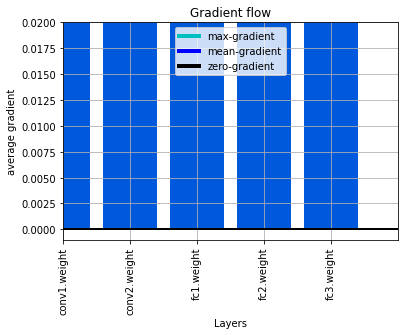

In [8]:
criterion = nn.MSELoss() # CrossEntropyLoss
optimizer = optim.RMSprop(pred_coordinates.parameters(), lr=0.0005) # RMSprop, Adam, SGD

episodes = 10
net, test_loss, train_loss, test_acc, train_acc  = train.train_dual_output(dataset_loader_train_data, dataset_loader_test_data, 
                                                                           pred_coordinates, criterion, optimizer, episodes)

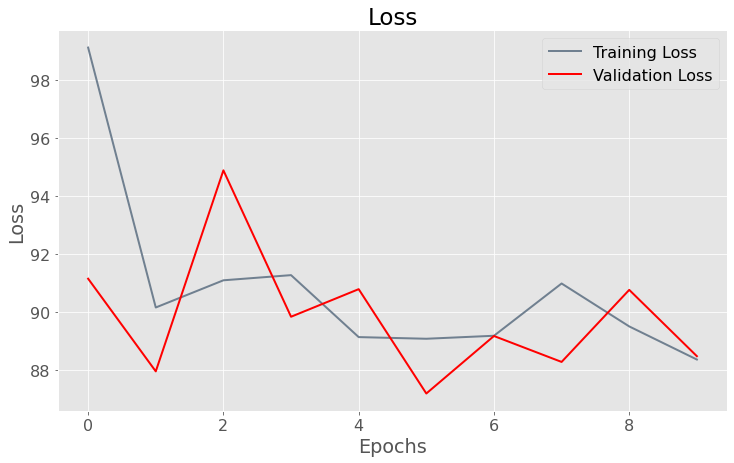

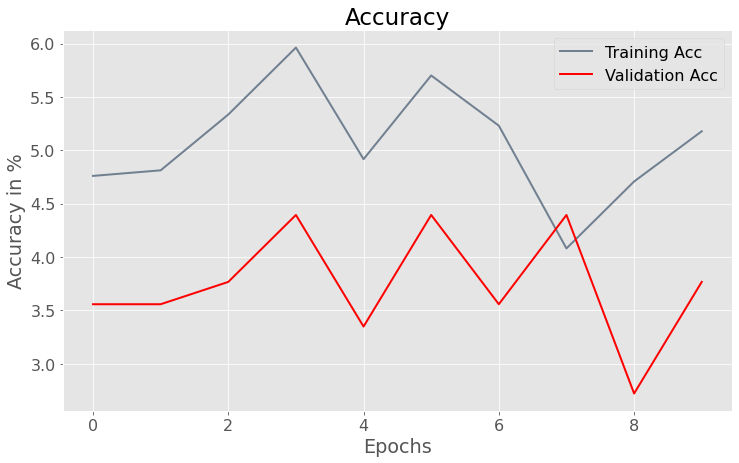

In [10]:
'''
Plot loss and accuracy curves for training and test set
'''

plot.plot_losses(test_loss, train_loss)
plot.plot_acc(test_acc, train_acc, smooth=False)

In [ ]:
'''
Save and load model
'''
import torch 

torch.save(net, 'models/DualOutput2.pt')